In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [41]:
# Reading in the data
df = pd.read_csv('water_potability.csv')

In [42]:
# Checking the first 5 rows of data
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [43]:
# Checking for null values in the data

df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [44]:
# Replacing null values with the respective mean values

df["ph"].fillna(value = df["ph"].mean(), inplace = True)
df["Sulfate"].fillna(value = df["Sulfate"].mean(), inplace = True)
df["Trihalomethanes"].fillna(value = df["Trihalomethanes"].mean(), inplace = True)

In [45]:
# Rechecking null values

df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [46]:
# Checking the data for correlation

df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


In [47]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [48]:
water_cols = list(df.columns)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ph', ylabel='Density'>

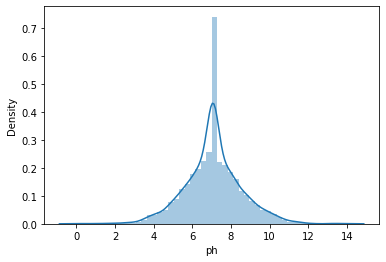

In [49]:
# Looking at a historgram of each column of data
sns.distplot(df["ph"])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distirbutiuon of Hardness Values')

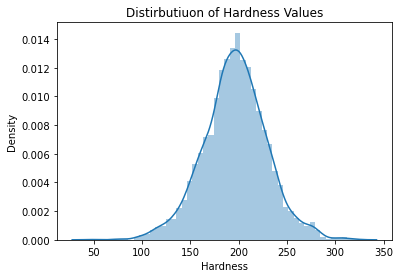

In [50]:
sns.distplot(df["Hardness"])
plt.title("Distirbutiuon of Hardness Values")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


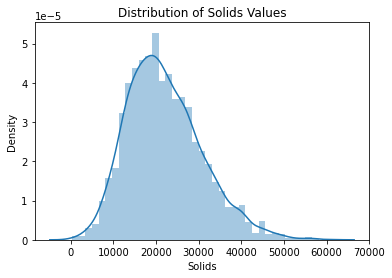

In [51]:
sns.distplot(df["Solids"])
plt.title("Distribution of Solids Values");

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


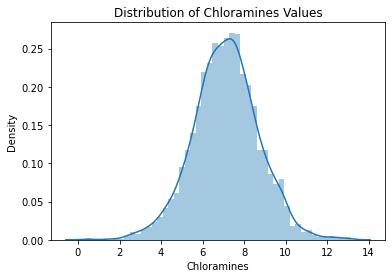

In [52]:
sns.distplot(df["Chloramines"])
plt.title("Distribution of Chloramines Values");

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Sulfate Values')

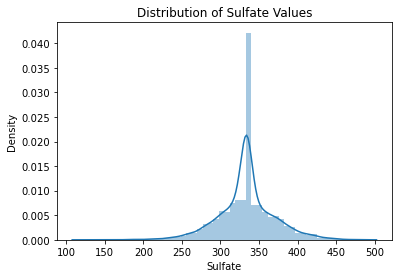

In [53]:
sns.distplot(df["Sulfate"])
plt.title("Distribution of Sulfate Values")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distirbution of Conductivity Values')

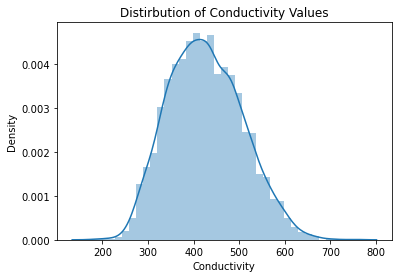

In [54]:
sns.distplot(df["Conductivity"])
plt.title("Distirbution of Conductivity Values")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Organic Carbon Values')

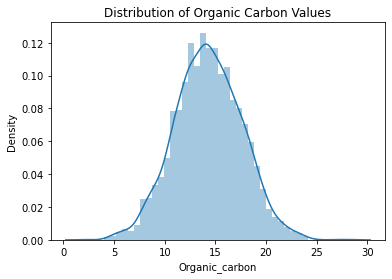

In [55]:
sns.distplot(df["Organic_carbon"])
plt.title("Distribution of Organic Carbon Values")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Trihalomethanes Values')

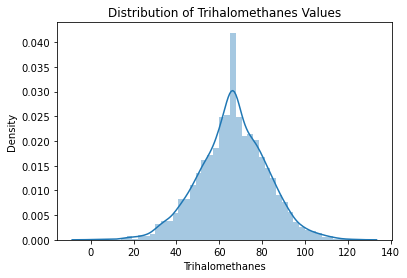

In [56]:
sns.distplot(df["Trihalomethanes"])
plt.title("Distribution of Trihalomethanes Values")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Turbidity Values')

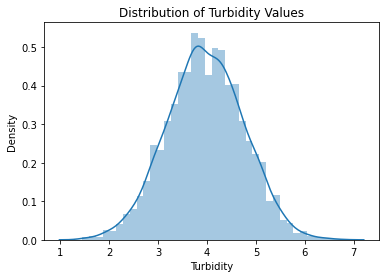

In [57]:
sns.distplot(df["Turbidity"])
plt.title("Distribution of Turbidity Values")

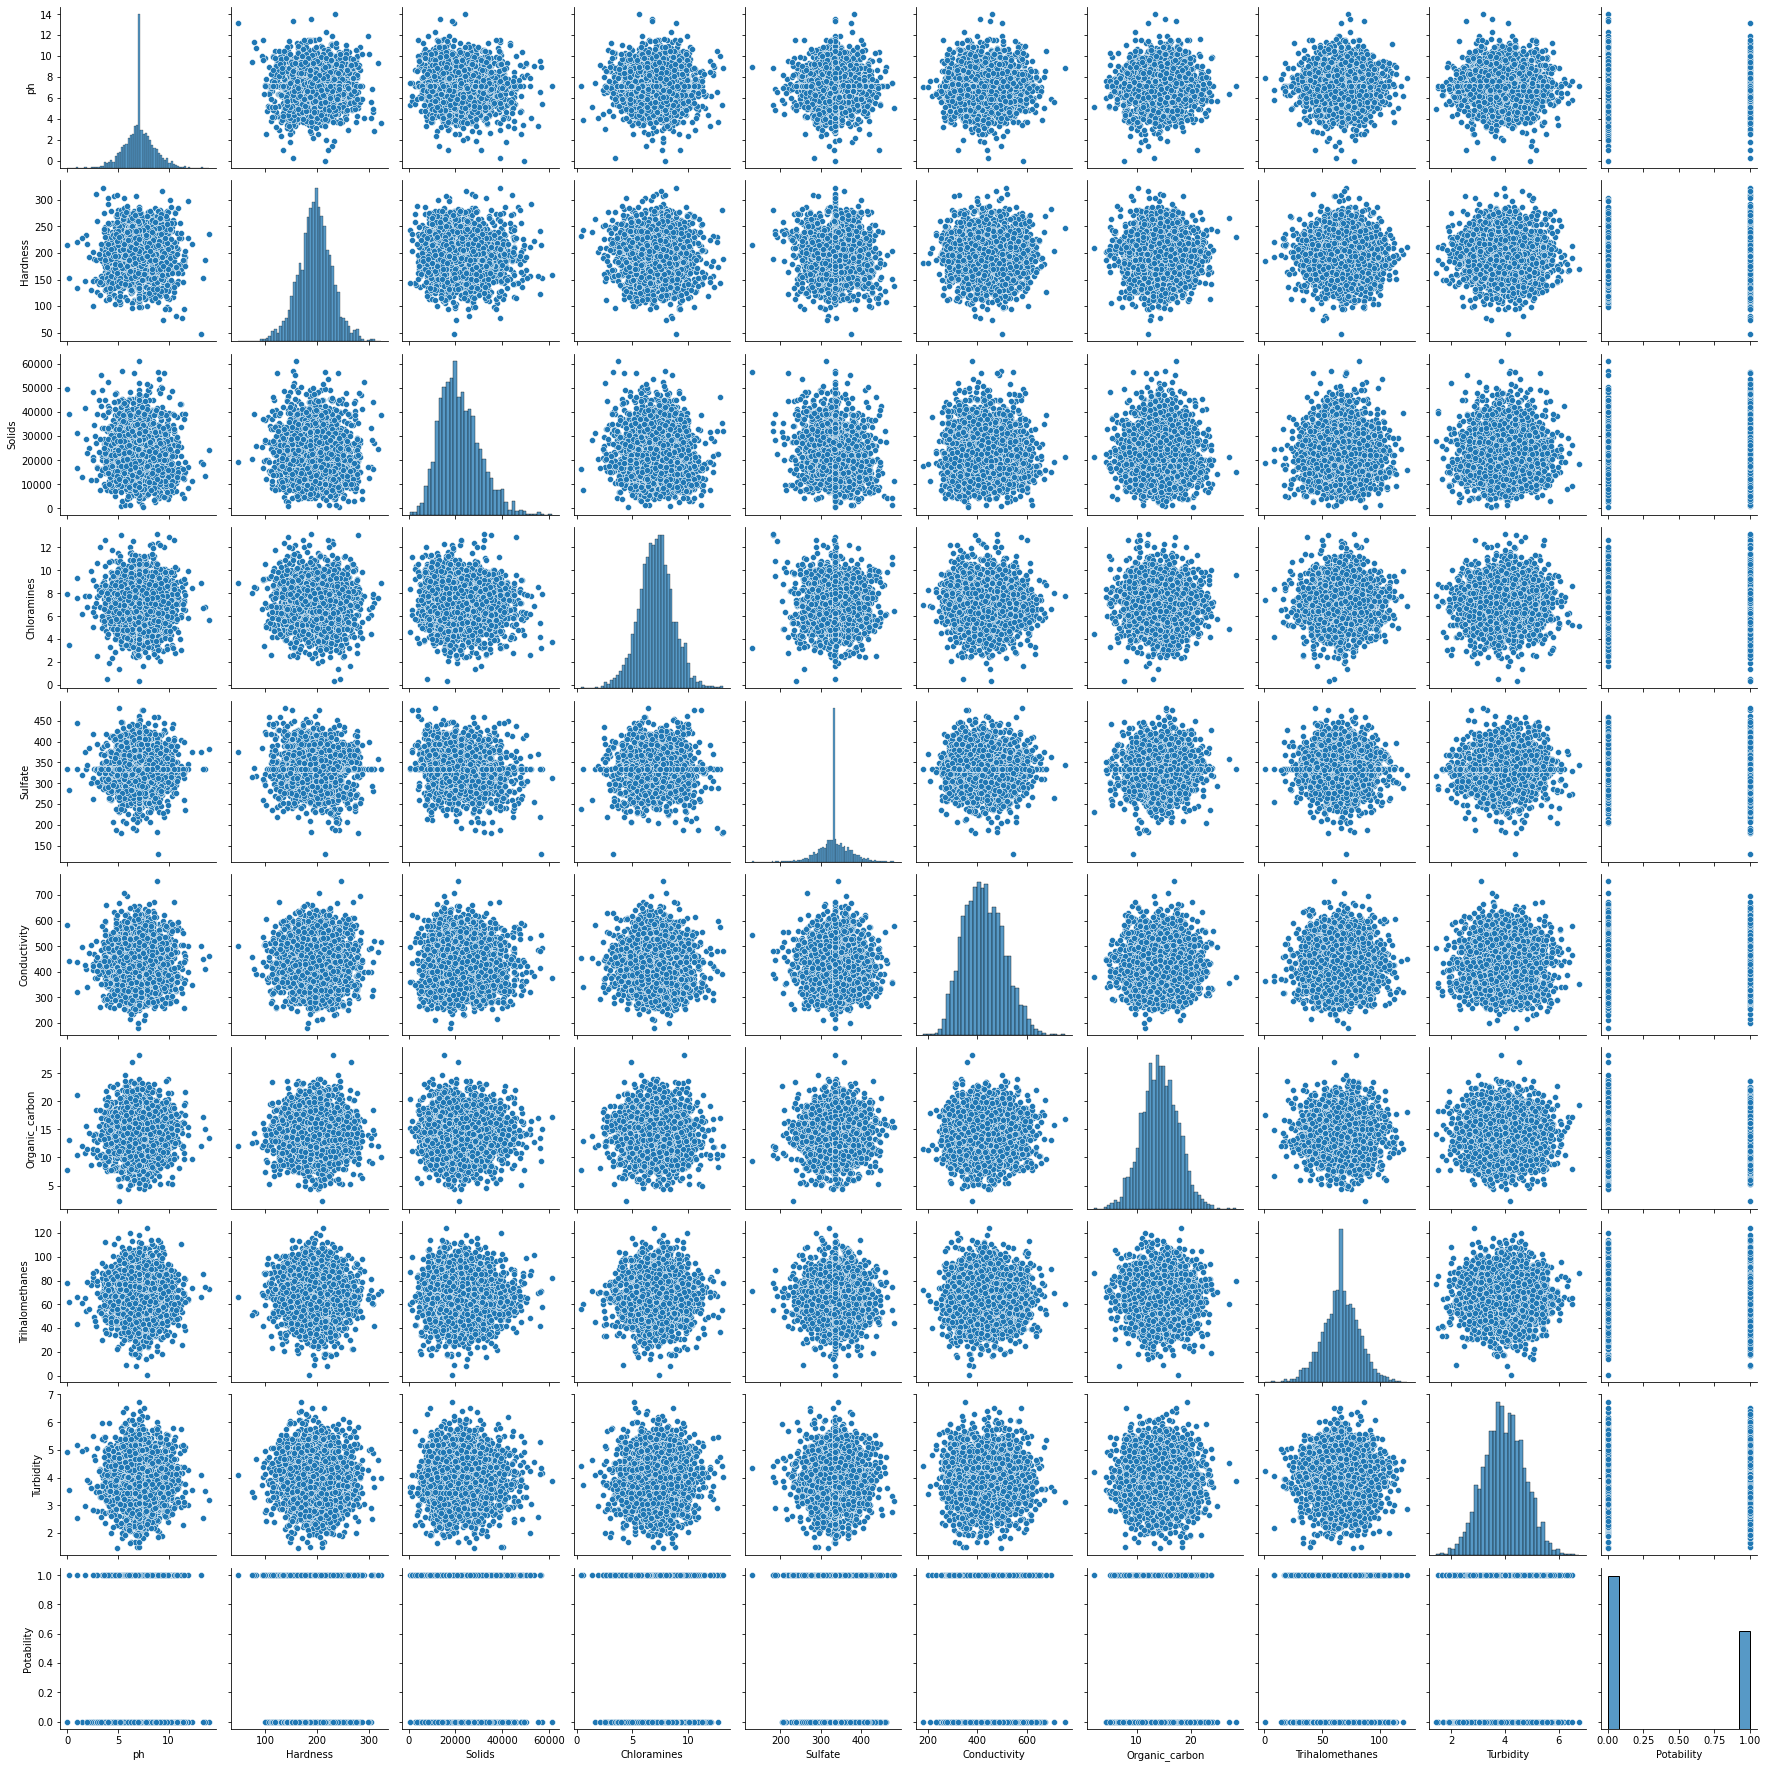

In [58]:
sns.pairplot(data = df)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Potability', ylabel='Density'>

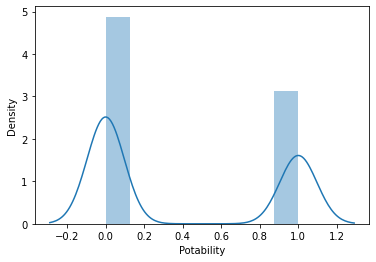

In [59]:
# Finally, taking a look at the distribution of potable vs non potable water in the data

sns.distplot(df["Potability"])

In [60]:
# Checking the distribution of values in potability
df["Potability"].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

Splitting Train/Test

In [61]:
X = df.drop("Potability", axis = 1)
y = df["Potability"]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=31)

KNN Classifier

In [63]:
knn = KNeighborsClassifier(n_neighbors = 9)

In [64]:
# Fitting the model to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [65]:
# Generating predictions from the test data
knn_preds = knn.predict(X_test)

In [66]:
# Evaluating accuracy score of KNN model
knn_acc = accuracy_score(y_test, knn_preds)
print(knn_acc)

0.5696846388606307


Decision Trees

In [67]:
clf = DecisionTreeClassifier()

In [68]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [69]:
clf_preds = clf.predict(X_test)

In [70]:
clf_acc = accuracy_score(y_test, clf_preds)
print(clf_acc)

0.5696846388606307


In [71]:
# plot_tree(clf)

Random Forest

In [72]:
rf = RandomForestClassifier()

In [73]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [74]:
rf_preds = rf.predict(X_test)

In [76]:
rf_acc = accuracy_score(rf_preds, y_test)
print(rf_acc)

0.6642929806714141


Comparing Results

In [77]:
# Accuracy scores of each model

print(f"The accuracy score of the KNN model was {knn_acc}")
print()
print(f"The accuracy score of the decision trees model was {clf_acc}")
print()
print(f'The accuracy score of the random forests model was {rf_acc}')

The accuracy score of the KNN model was 0.5696846388606307

The accuracy score of the decision trees model was 0.5696846388606307

The accuracy score of the random forests model was 0.6642929806714141
